# Faizal Rahman Mini Lab 1

Building on the cleaned, complete HDB Resale Pricing Dataset created from the first round of EDA, we will use that as a starting point.

#### Objective :  Build a linear regression model that predicts the price of houses based on a set of variables

## EDA and Feature Engineering

In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
#load and read completed file

hdb = pd.read_csv ('HDB_Resale_Complete.csv', header = 0)
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm
0,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,290.322581
1,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,193.548387
2,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,258.064516
3,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,193.548387
4,1990-01-01,Ang Mo Kio,3 Room,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,646.575342


In [336]:
hdb.describe()

,floor_area_sqm,lease_commence_date,resale_price,price_per_sqm
count,819527.000000,819527.000000,8.195270e+05,819527.000000
mean,95.542011,1987.067330,2.921900e+05,3015.225607
std,26.067522,9.356102,1.479776e+05,1265.489655
min,28.000000,1966.000000,5.000000e+03,161.290323
25%,73.000000,1980.000000,1.800000e+05,2224.489796
50%,93.000000,1986.000000,2.740000e+05,2762.711864
75%,114.000000,1994.000000,3.800000e+05,3739.130435
max,307.000000,2016.000000,1.232000e+06,12762.236559


In [337]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819527 entries, 0 to 819526
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                819527 non-null  object 
 1   town                 819527 non-null  object 
 2   flat_type            819527 non-null  object 
 3   block                819527 non-null  object 
 4   street_name          819527 non-null  object 
 5   storey_range         819527 non-null  object 
 6   floor_area_sqm       819527 non-null  float64
 7   flat_model           819527 non-null  object 
 8   lease_commence_date  819527 non-null  int64  
 9   resale_price         819527 non-null  float64
 10  price_per_sqm        819527 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 68.8+ MB


As you can see, we have a lot of categorical variables. We will need to convert some of these to numerical variables, in order to have additional variables with which to perform linear regression with.

#### Turning towns into a numerical feature
Towns is a categorical variable, and as such we will need to convert this to numerical data for the purposes of regression analysis.

In [339]:
hdb['town'].value_counts()

Tampines           72545
Yishun             63117
Bedok              60956
Jurong West        60259
Woodlands          58301
Ang Mo Kio         47937
Hougang            45071
Bukit Batok        40215
Choa Chu Kang      33090
Bukit Merah        30294
Pasir Ris          29994
Toa Payoh          28304
Queenstown         25709
Clementi           25570
Geylang            25510
Bukit Panjang      23880
Kallang/Whampoa    23867
Sengkang           23226
Jurong East        22698
Serangoon          20997
Bishan             19414
Punggol            11737
Sembawang          10858
Marine Parade       7353
Central Area        6291
Bukit Timah         2270
Lim Chu Kang          64
Name: town, dtype: int64

As you can see, we have close to 27 different towns to account for. In order to make this data more useful for analysis, we will group these towns into their respective planning regions.  

More details can be found here : https://en.wikipedia.org/wiki/Regions_of_Singapore  

For Simplicity's sake, we will be using the following numerical convention for each region :  

Central : 1  
East : 2  
North-East : 3   
North : 4  
West : 5

In [340]:
#duplicate town column
hdb['region'] = hdb['town']
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,region
0,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,290.322581,Ang Mo Kio
1,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,193.548387,Ang Mo Kio
2,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,258.064516,Ang Mo Kio
3,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,193.548387,Ang Mo Kio
4,1990-01-01,Ang Mo Kio,3 Room,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,646.575342,Ang Mo Kio


In [341]:
#replace central regions
hdb['region'].replace(['Central Area','Bishan','Bukit Merah','Bukit Timah','Geylang', 'Kallang/Whampoa','Marine Parade', 'Queenstown','Toa Payoh' ],1, inplace=True)
#replace east regions
hdb['region'].replace(['Tampines','Bedok', 'Pasir Ris' ],2, inplace=True)
#replace north-east regions
hdb['region'].replace(['Ang Mo Kio', 'Hougang','Punggol','Sengkang', 'Serangoon' ],3, inplace=True)
#replace north regions
hdb['region'].replace(['Lim Chu Kang', 'Sembawang', 'Yishun', 'Woodlands' ],4, inplace=True)
#replace west regions
hdb['region'].replace(['Jurong West', 'Bukit Batok', 'Choa Chu Kang', 'Clementi', 'Bukit Panjang', 'Jurong East' ],5, inplace=True)



#Check all towns have been replaced
hdb['region'].unique()

array([3, 2, 1, 5, 4], dtype=int64)

#### Turning storey_range into a numerical feature
We have 25 storey ranges within the dataset that are categorical. We need to change this to a numerical feature in order to use this for linear regression.

In [342]:
hdb['storey_range'].value_counts()

04 TO 06    208042
07 TO 09    187710
01 TO 03    167642
10 TO 12    159034
13 TO 15     51497
16 TO 18     19103
19 TO 21      9300
22 TO 24      5950
01 TO 05      2700
25 TO 27      2484
06 TO 10      2474
11 TO 15      1259
28 TO 30      1015
16 TO 20       265
34 TO 36       257
31 TO 33       251
37 TO 39       241
40 TO 42       121
21 TO 25        92
26 TO 30        39
46 TO 48        20
43 TO 45        14
49 TO 51         8
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [343]:
hdb['storey_range'].replace({
    '01 TO 03' : 1,
    '01 TO 05' : 2,
    '04 TO 06' : 3,
    '06 TO 10' : 4,
    '07 TO 09' : 5,
    '10 TO 12' : 6,
    '11 TO 15' : 7,
    '13 TO 15' : 8,
    '16 TO 18' : 9,
    '16 TO 20' : 10,
    '19 TO 21' : 11,
    '21 TO 25' : 12,
    '22 TO 24' : 13,
    '25 TO 27' : 14,
    '26 TO 30' : 15,
    '28 TO 30' : 16,
    '31 TO 33' : 17,
    '31 TO 35' : 18,
    '34 TO 36' : 19,
    '36 TO 40' : 20,
    '37 TO 39' : 21,
    '40 TO 42' : 22,
    '43 TO 45' : 23,
    '46 TO 48' : 24,
    '49 TO 51' : 25
}, inplace=True)

hdb['storey_range'].unique()

array([ 6,  3,  5,  1,  8, 11,  9, 14, 13, 16, 17, 22, 21, 19,  4,  2,  7,
       10, 12, 15, 20, 18, 24, 23, 25], dtype=int64)

We have some overlapping of storey ranges, e.g. 01 to 05 and 01 to 03. This is likely due to the different files with which the data has been compiled over. Since we have no additional data to further group these data accordingly, we will keep them separate for now.

#### Turning Flat_type into a numerical feature

Flat_type currently shows the 7 different types of flats that are available in Singapore

In [344]:
#identify unique flat_types in the dataset
hdb['flat_type'].unique()

array(['1 Room', '3 Room', '4 Room', '5 Room', '2 Room', 'Executive',
       'Multi-Generation'], dtype=object)

In [345]:
#duplicate flat_type column
hdb['type_index'] = hdb['flat_type']
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,region,type_index
0,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,9000.0,290.322581,3,1 Room
1,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,3,31.0,Improved,1977,6000.0,193.548387,3,1 Room
2,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,8000.0,258.064516,3,1 Room
3,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,5,31.0,Improved,1977,6000.0,193.548387,3,1 Room
4,1990-01-01,Ang Mo Kio,3 Room,216,ANG MO KIO AVE 1,3,73.0,New Generation,1976,47200.0,646.575342,3,3 Room


In [346]:
#replace strings with values
hdb['type_index'].replace({
    '1 Room' : 1,
    '2 Room' : 2,
    '3 Room' : 3,
    '4 Room' : 4,
    '5 Room' : 5,
    'Executive' : 6,
    'Multi-Generation' : 7
}, inplace=True)

hdb['type_index'].unique()

array([1, 3, 4, 5, 2, 6, 7], dtype=int64)

#### Creating an additional dummy variable based on region and flat-type

Aside from the size of the house, it must also be noted that where the house is located will have an impact on how much it will cost.

In [347]:
#combine both region and type_index to create a new index
hdb['type_region'] = hdb['region'] + (hdb['type_index']/10)
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,region,type_index,type_region
0,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,9000.0,290.322581,3,1,3.1
1,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,3,31.0,Improved,1977,6000.0,193.548387,3,1,3.1
2,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,8000.0,258.064516,3,1,3.1
3,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,5,31.0,Improved,1977,6000.0,193.548387,3,1,3.1
4,1990-01-01,Ang Mo Kio,3 Room,216,ANG MO KIO AVE 1,3,73.0,New Generation,1976,47200.0,646.575342,3,3,3.3


This is what the type_region index signifies

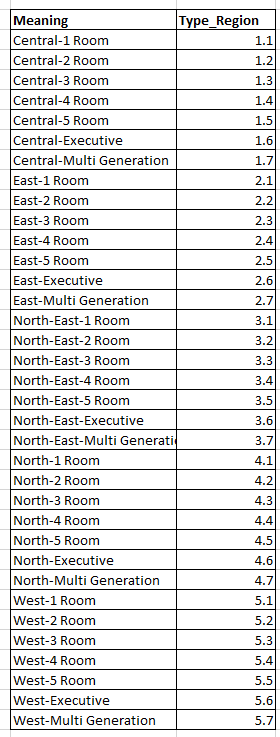

#### Create a new variable for the age of the house

HDB houses in Singapore all have a 99 year lease. Using this information and the lease commencement date, we can use this to see if there is any impact to the price of the house

In [348]:
hdb['remaining_lease'] = 99 - (2020 - hdb['lease_commence_date'])
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,region,type_index,type_region,remaining_lease
0,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,9000.0,290.322581,3,1,3.1,56
1,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,3,31.0,Improved,1977,6000.0,193.548387,3,1,3.1,56
2,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,8000.0,258.064516,3,1,3.1,56
3,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,5,31.0,Improved,1977,6000.0,193.548387,3,1,3.1,56
4,1990-01-01,Ang Mo Kio,3 Room,216,ANG MO KIO AVE 1,3,73.0,New Generation,1976,47200.0,646.575342,3,3,3.3,55


### Finding the right time frame to start performing regression analysis

The data we have right now extends across a long timeframe (1990 - 2020). Such long timeframes will have factors outside of this dataset that could influence housing prices. (e.g. Inflation, Market crash) As such, we will be looking for a more recent time frame where the house pricing data has remained relatively stable.

In [349]:
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,region,type_index,type_region,remaining_lease
0,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,9000.0,290.322581,3,1,3.1,56
1,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,3,31.0,Improved,1977,6000.0,193.548387,3,1,3.1,56
2,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,8000.0,258.064516,3,1,3.1,56
3,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,5,31.0,Improved,1977,6000.0,193.548387,3,1,3.1,56
4,1990-01-01,Ang Mo Kio,3 Room,216,ANG MO KIO AVE 1,3,73.0,New Generation,1976,47200.0,646.575342,3,3,3.3,55


#### Create a transaction year identifier to understand how prices have been trending

In [350]:
hdb['trx_year'] = hdb['month'].str[:4]
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,region,type_index,type_region,remaining_lease,trx_year
0,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,9000.0,290.322581,3,1,3.1,56,1990
1,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,3,31.0,Improved,1977,6000.0,193.548387,3,1,3.1,56,1990
2,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,6,31.0,Improved,1977,8000.0,258.064516,3,1,3.1,56,1990
3,1990-01-01,Ang Mo Kio,1 Room,309,ANG MO KIO AVE 1,5,31.0,Improved,1977,6000.0,193.548387,3,1,3.1,56,1990
4,1990-01-01,Ang Mo Kio,3 Room,216,ANG MO KIO AVE 1,3,73.0,New Generation,1976,47200.0,646.575342,3,3,3.3,55,1990


#### Temporarily create a groupby to analyze average housing price by type of flat

In [351]:
price_analysis = pd.DataFrame(hdb.groupby(['flat_type','trx_year'], as_index=False)['resale_price'].mean() )
price_analysis

,flat_type,trx_year,resale_price
0,1 Room,1990,7890.540541
1,1 Room,1991,8501.568627
2,1 Room,1992,9648.979592
3,1 Room,1993,17634.615385
4,1 Room,1994,24824.691358
...,...,...,...
210,Multi-Generation,2015,805000.000000
211,Multi-Generation,2016,722750.000000
212,Multi-Generation,2017,783750.000000
213,Multi-Generation,2018,801392.533333


In [367]:
hdb['trx_year'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

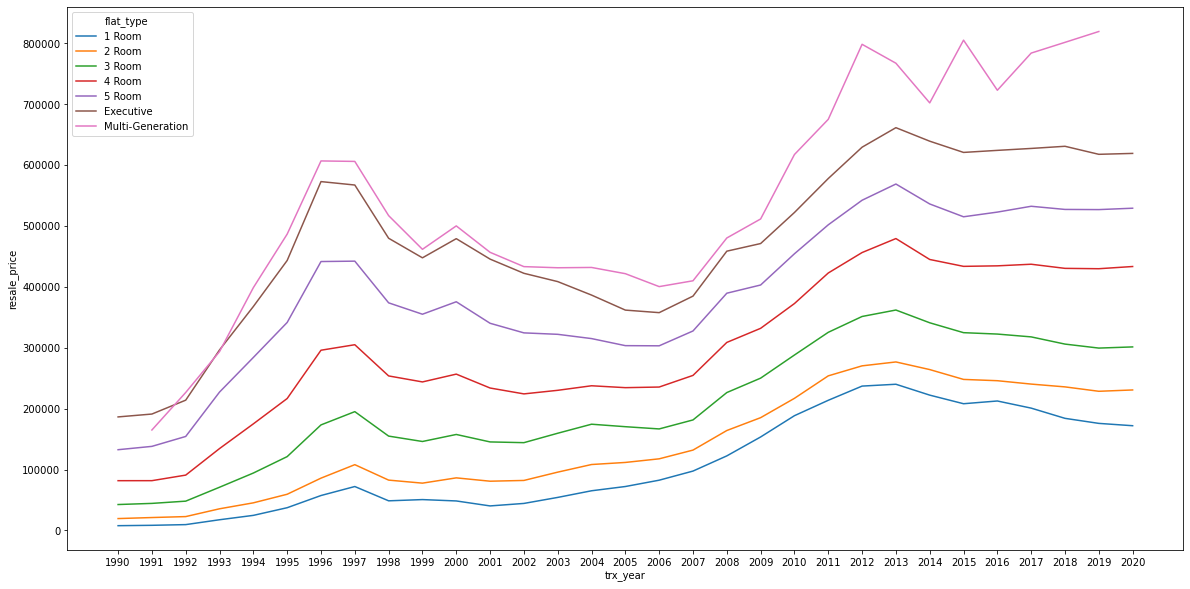

In [352]:
plt.figure(figsize=(20,10))
sns.lineplot(x="trx_year", y="resale_price", hue="flat_type",data=price_analysis)

As you can see, the most recent timeframe where prices have remained relatively stable would be between 2015 - 2020.  
We will need investigate deeper into the multi-generation flats in order to see if their price fluctuation will have a material impact on our analysis.  

Deep-dive into Multi-Generation flats

Yishun      22
Tampines    10
Bishan       6
Name: town, dtype: int64
Jurong West        888
Woodlands          875
Pasir Ris          867
Tampines           734
Sengkang           691
Hougang            618
Choa Chu Kang      555
Sembawang          465
Bukit Panjang      461
Yishun             398
Bukit Batok        366
Serangoon          339
Bedok              302
Jurong East        222
Bishan             203
Punggol            186
Geylang            109
Clementi            85
Toa Payoh           75
Kallang/Whampoa     63
Ang Mo Kio          62
Bukit Timah         61
Queenstown          30
Name: town, dtype: int64


Text(0.5, 1.0, 'Resale Price Distribution from 2015 to 2020')

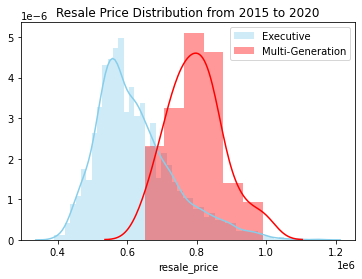

In [387]:
trx_year2 = hdb.trx_year.isin( ['2015','2016','2017','2018','2019','2020'])

mg = hdb[(trx_year2 == True) & (hdb['flat_type'] == 'Multi-Generation')]
print(mg['town'].value_counts())


Exec = hdb[(trx_year2 == True) & (hdb['flat_type'] == 'Executive')]

print(Exec['town'].value_counts())


sns.distplot( Exec["resale_price"] , color="skyblue", label="Executive")
sns.distplot( mg["resale_price"] , color="red", label="Multi-Generation")
plt.legend()
plt.title('Resale Price Distribution from 2015 to 2020')



The erratic nature of average annual pricing for Multi-Genration flats can be attributed to the lower number of overall transaction data, coupled with the respective mix of these transactions. For the same period of 2015-2020, there were 8,655 resale transactions involving executive flats, while there were only 38 transactions involving multi-generation flats, spread out across 3 Towns.

Create an additional analysis to understand the impact of housing prices by region

In [353]:

price_analysis2 = pd.DataFrame(hdb.groupby(['region','trx_year'], as_index=False)['resale_price'].mean() )
price_analysis2

,region,trx_year,resale_price
0,1,1990,61607.181266
1,1,1991,70868.981501
2,1,1992,82697.821677
3,1,1993,127133.612129
4,1,1994,163146.474535
...,...,...,...
150,5,2016,407122.687593
151,5,2017,406883.998922
152,5,2018,401319.584260
153,5,2019,398791.755679


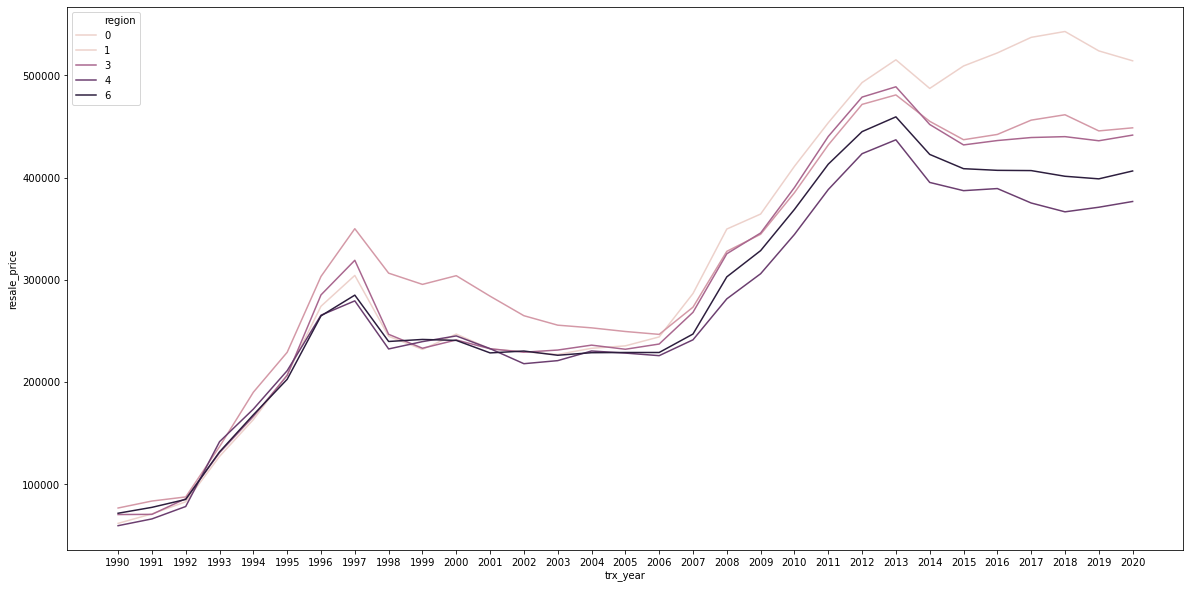

In [303]:
plt.figure(figsize=(20,10))
sns.lineplot(x="trx_year", y="resale_price", hue="region",data=price_analysis2)

Harder to conclude results at a region level.  
This could possibly be due to the various mix of different types of houses in each region, coupled with the fact that the regions are not necessarily equal in size.

### Create new dataframe based on chosen TimeFrame

In [391]:
trx_year = hdb.trx_year.isin( ['2015','2016','2017','2018','2019','2020'])
hdb = hdb[trx_year == True] 
print(hdb.shape)
print(hdb.head())

(110473, 16)
             month        town flat_type block        street_name  \
709054  2015-01-01  Ang Mo Kio    3 Room   174   ANG MO KIO AVE 4   
709055  2015-01-01  Ang Mo Kio    3 Room   541  ANG MO KIO AVE 10   
709056  2015-01-01  Ang Mo Kio    3 Room   163   ANG MO KIO AVE 4   
709057  2015-01-01  Ang Mo Kio    3 Room   446  ANG MO KIO AVE 10   
709058  2015-01-01  Ang Mo Kio    3 Room   557  ANG MO KIO AVE 10   

        storey_range  floor_area_sqm      flat_model  lease_commence_date  \
709054             5            60.0        Improved                 1986   
709055             1            68.0  New Generation                 1981   
709056             1            69.0  New Generation                 1980   
709057             1            68.0  New Generation                 1979   
709058             5            68.0  New Generation                 1980   

        resale_price  price_per_sqm  region  type_index  type_region  \
709054      255000.0    4250.000000  

### Understand the correlation between various variables

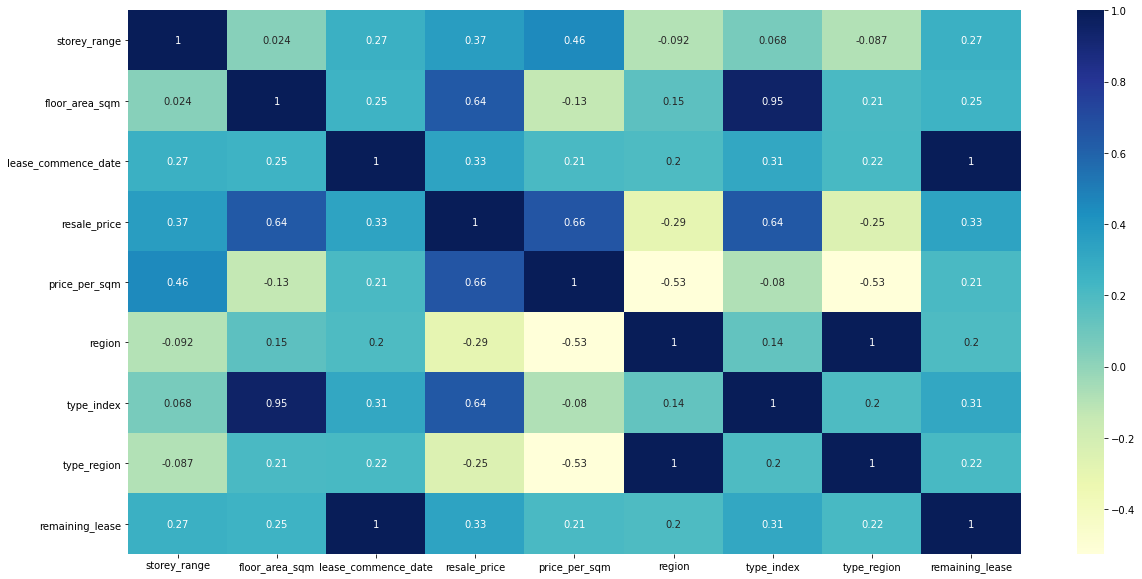

In [392]:
plt.figure(figsize=(20,10))
sns.heatmap(hdb.corr(), annot=True, cmap="YlGnBu")
plt.show()                                 

Observations :  
- floor_area_sqm is highly correlated to type_index, we will likely keep type_index as it is a more useful indicator of the house for everday cases (e.g. a person decides on a 4-room vs 5-Room, not purely on overall house size
- remaining_lease and lease_commence_date are highly correlated. We will drop lease commencement date since it is a more often used metric when purchasing the house

In [411]:
hdb.describe()

,storey_range,floor_area_sqm,lease_commence_date,resale_price,price_per_sqm,region,type_index,type_region,remaining_lease
count,110473.000000,110473.000000,110473.000000,1.104730e+05,110473.000000,110473.000000,110473.000000,110473.000000,110473.000000
mean,4.822690,97.430480,1992.878740,4.377173e+05,4531.365029,3.122319,4.122111,3.534531,71.878740
std,3.062119,24.228285,12.161286,1.476312e+05,1159.789835,1.423840,0.923453,1.439286,12.161286
min,1.000000,31.000000,1966.000000,1.400000e+05,2089.552239,1.000000,1.000000,1.100000,45.000000
25%,3.000000,77.000000,1984.000000,3.330000e+05,3773.584906,2.000000,3.000000,2.400000,63.000000
50%,5.000000,95.000000,1992.000000,4.080000e+05,4252.427184,3.000000,4.000000,3.400000,71.000000
75%,6.000000,112.000000,2002.000000,5.050000e+05,4913.043478,4.000000,5.000000,4.600000,81.000000
max,25.000000,280.000000,2016.000000,1.232000e+06,12762.236559,5.000000,7.000000,5.600000,95.000000


### Forward Feature Selction and Regression Analysis

In [479]:
# define the target variable (dependent variable) as y
y = hdb['resale_price']

# Take all columns except target as predictor columns
predictor_columns = ['storey_range', 'type_index', 'price_per_sqm', 'region','type_region','remaining_lease']
# Load the dataset as a pandas data frame
X = pd.DataFrame(hdb, columns = predictor_columns)
X.head()

,storey_range,type_index,price_per_sqm,region,type_region,remaining_lease
709054,5,3,4250.000000,3,3.3,65
709055,1,3,4044.117647,3,3.3,60
709056,1,3,4130.434783,3,3.3,59
709057,1,3,4264.705882,3,3.3,58
709058,5,3,4264.705882,3,3.3,59


In [480]:
## Create training and testing subsets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [481]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [482]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]


while True: #this is an endless loop, but there is a break statement at the end  of this loop to ensure the program produced the output
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[(included + [new_column])].values, y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_test[(included + [new_column])].values, y_test) # calculate the score
        # number of predictors in this model
        k = len(included) +1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-k-1)) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = type_index, remaining_lease, type_region, price_per_sqm, region, storey_range
(Step) Trying type_index...
(Step) - Features = type_index
(Step) - Adjusted R^2: This = 0.415; Best = 0.000
(Step) - New Best!   : Feature = type_index; R^2 = 0.415; Adjusted R^2 = 0.415
(Step) Trying remaining_lease...
(Step) - Features = remaining_lease
(Step) - Adjusted R^2: This = 0.110; Best = 0.415
(Step) Trying type_region...
(Step) - Features = type_region
(Step) - Adjusted R^2: This = 0.063; Best = 0.415
(Step) Trying price_per_sqm...
(Step) - Features = price_per_sqm
(Step) - Adjusted R^2: This = 0.440; Best = 0.415
(Step) - New Best!   : Feature = price_per_sqm; R^2 = 0.440; Adjusted R^2 = 0.440
(Step) Trying region...
(Step) - Features = region
(Step) - Adjusted R^2: This = 0.087; Best = 0.440
(Step) Trying storey_range...
(Step) - Features = storey_range
(Step) - Adjusted R^2: This = 0.135; Best = 0.440
Added feature price_per_sqm with R^2 = 0.440 and adjusted R^2 = 0.440

(St

Based on these results, we will use resale_price to create a regression analysis

In [483]:
# define the target variable (dependent variable) as y
y = hdb['resale_price']

# Take all columns except target as predictor columns
X = hdb[['price_per_sqm','type_index','remaining_lease']]
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [484]:
#Run linear regression process
lreg = LinearRegression()
lreg.fit(X_train.values, y_train)
y_pred = lreg.predict(X_test.values)



In [485]:
lreg.score(X_test.values,y_test)

0.9257509578993462

In [486]:
lreg.intercept_

-416430.11333238793

In [487]:
lreg.coef_

array([ 9.20614545e+01,  1.14280575e+05, -4.74742801e+02])

In [492]:
def housepredictor(psqm,ti,rl) : 
    y = (lreg.coef_[0] * psqm) + (lreg.coef_[1] * ti) + (lreg.coef_[2] * rl)  + lreg.intercept_
    dc = { 1 : '1 Room' , 2 : '2 Room' , 3 : '3 Room' , 4 : '4 Room', 5 : '5 Room', 6 : 'Executive', 7 : 'Multi-Generation'}
    psqm_l = psqm * 0.9
    psqm_u = psqm * 1.1
    y_l = y * 0.9
    rl_u = rl * 1.1
    sel = hdb[(hdb['price_per_sqm'] > psqm_l) & (hdb['price_per_sqm'] <= psqm_u) &
               (hdb['type_index'] == ti) & 
               (hdb['resale_price'] > y_l) & (hdb['resale_price'] <= y) &
               (hdb['remaining_lease'] > rl) & (hdb['remaining_lease'] <= rl_u)]
    pivot = pd.DataFrame(sel.groupby(['town', 'flat_type', 'region'], as_index=False)['resale_price'].mean())
    
    if len(sel) == 0 :
        print('Could not find any data')
    else :
        print('Your house will cost between $' + '{:,.0f}'.format(y_l) + ' and $' + '{:,.0f}'.format(y)) 
        print(pivot)

    return 

In [493]:
housepredictor(4000,5,71)

Your house will cost between $440,561 and $489,512
             town flat_type  region   resale_price
0           Bedok    5 Room       2  480000.000000
1     Bukit Batok    5 Room       5  463538.461538
2   Bukit Panjang    5 Room       5  461551.487179
3   Choa Chu Kang    5 Room       5  465639.608392
4         Hougang    5 Room       3  469850.666667
5     Jurong East    5 Room       5  470000.000000
6     Jurong West    5 Room       5  466564.879121
7       Pasir Ris    5 Room       2  469983.643478
8       Sembawang    5 Room       4  455119.365079
9        Sengkang    5 Room       3  463822.530120
10      Serangoon    5 Room       3  468612.000000
11       Tampines    5 Room       2  472295.294872
12      Woodlands    5 Room       4  462486.000000
13         Yishun    5 Room       4  470988.800000


In [491]:
housepredictor(2000,5,71)

Could not find any data


Proximity to infra (train station, highway, etc)  
Proximity to schools  
Recheck without the price per sqm metric
What happens as lease_remaining starts to end, what is the impact on house price ?  
Postal code for area demographics  
TL;DR : expand further on data